# stock prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

import warnings

warnings.filterwarnings("ignore")

df= pd.read_csv("/content/stock_data.csv")

df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Name
0,NaN,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,NaN,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,NaN,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,NaN,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,NaN,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [2]:
df.drop(columns="Unnamed: 0", inplace=True)

df.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [4]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


In [5]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True, errors="coerce")

In [6]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


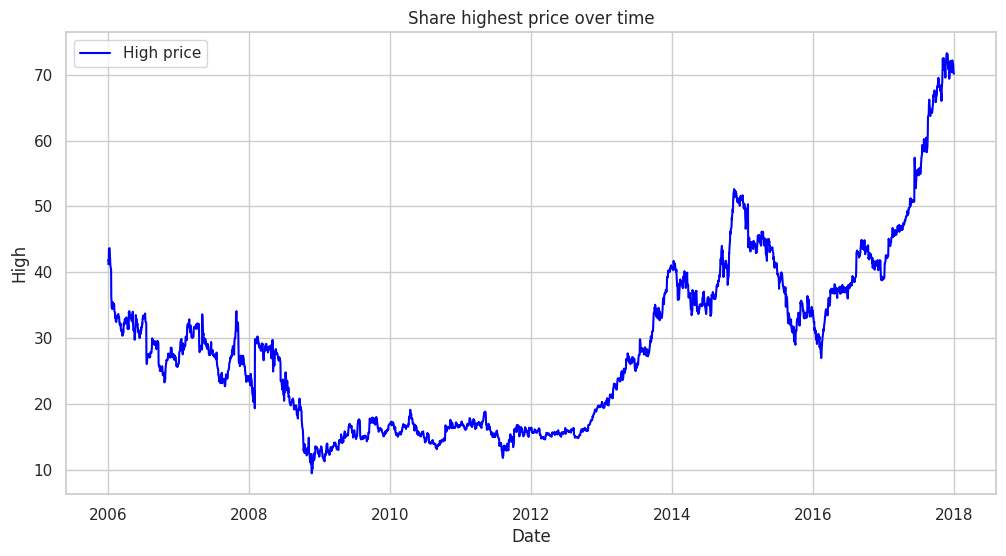

In [7]:
# Plotting high stock prices

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))

sns.lineplot(data=df,x="Date", y="High", label="High price", color="blue" )

plt.xlabel("Date")
plt.ylabel("High")
plt.title("Share highest price over time")

plt.show()

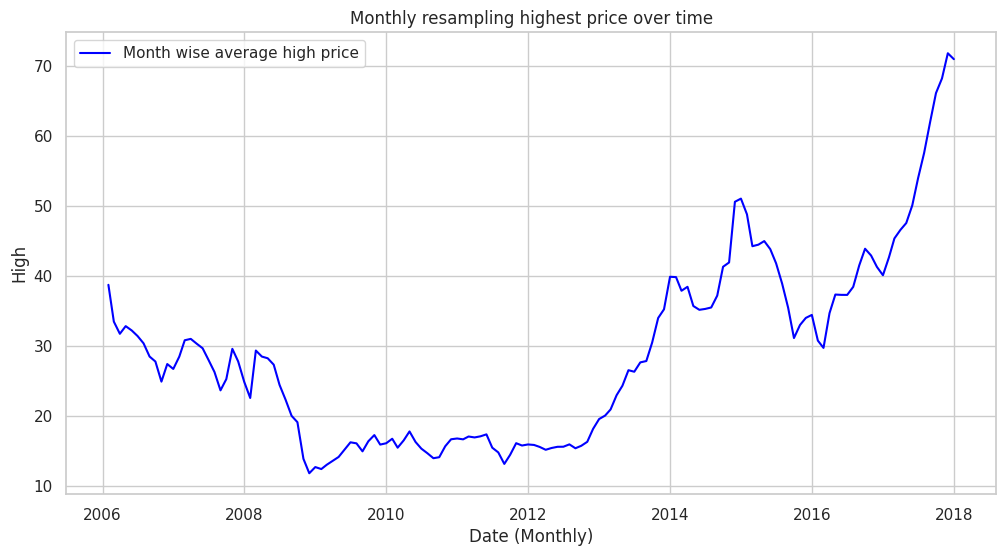

In [14]:
df_resampled = df.resample('M').mean(numeric_only=True)

sns.set(style="whitegrid")

plt.figure(figsize=(12,6))

sns.lineplot(data=df_resampled, x=df_resampled.index, y="High", label="Month wise average high price", color="blue")

plt.xlabel("Date (Monthly)")
plt.ylabel("High")
plt.title("Monthly resampling highest price over time")

plt.show()

Text(0.5, 1.0, 'Autocorrelate fn acf plot')

<Figure size 1200x600 with 0 Axes>

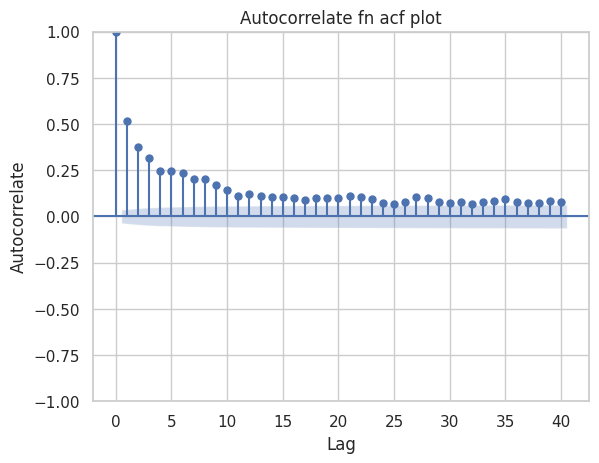

In [16]:
plt.figure(figsize=(12,6))
plot_acf(df["Volume"], lags=40)
plt.xlabel("Lag")
plt.ylabel("Autocorrelate")
plt.title("Autocorrelate fn acf plot")

In [17]:
result = adfuller(df["High"])

print("ADF statistics: ", result[0])
print("p-value: ", result[1])
print("Critical values: ", result[4])

ADF statistics:  0.7671404880535936
p-value:  0.9910868050318213
Critical values:  {'1%': np.float64(-3.4325316347197403), '5%': np.float64(-2.862503905260741), '10%': np.float64(-2.5672831121111113)}


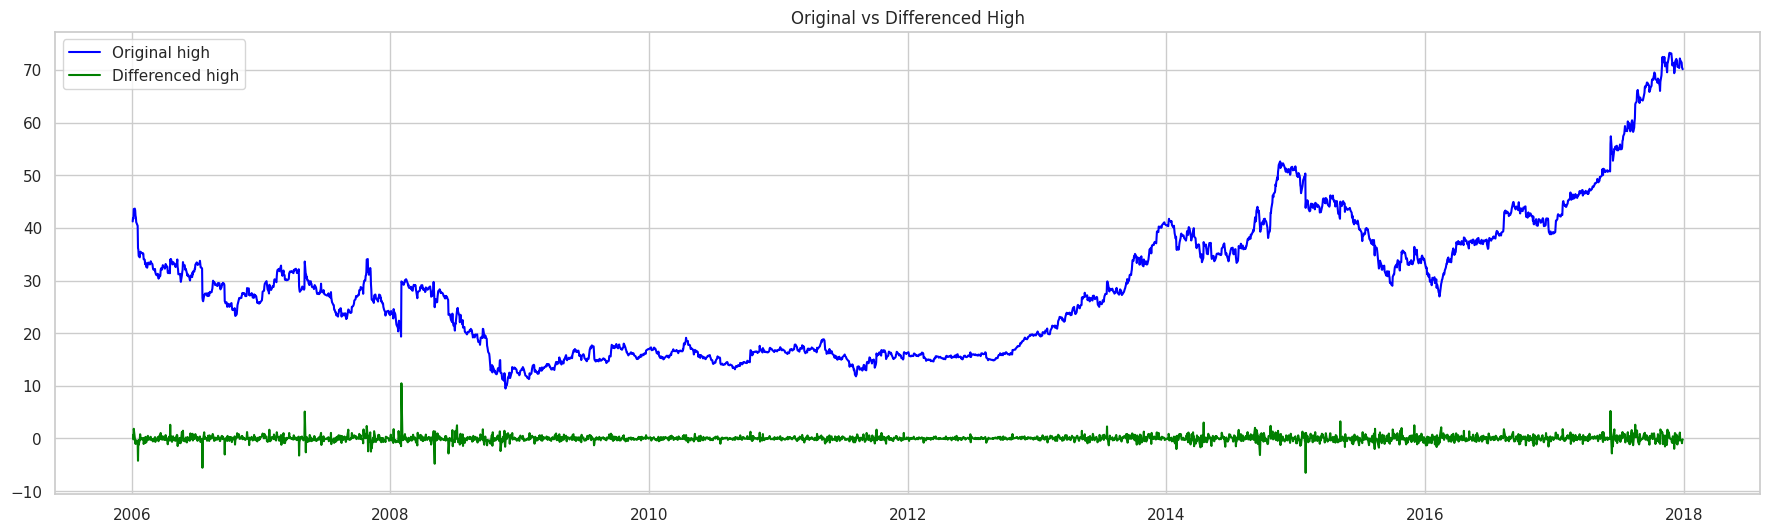

In [21]:
df["high_diff"] =df["High"].diff()

plt.figure(figsize=(22,6))

plt.plot(df["High"], label="Original high", color="blue")
plt.plot(df["high_diff"], label="Differenced high", color="green")

plt.legend()
plt.title("Original vs Differenced High")
plt.show()

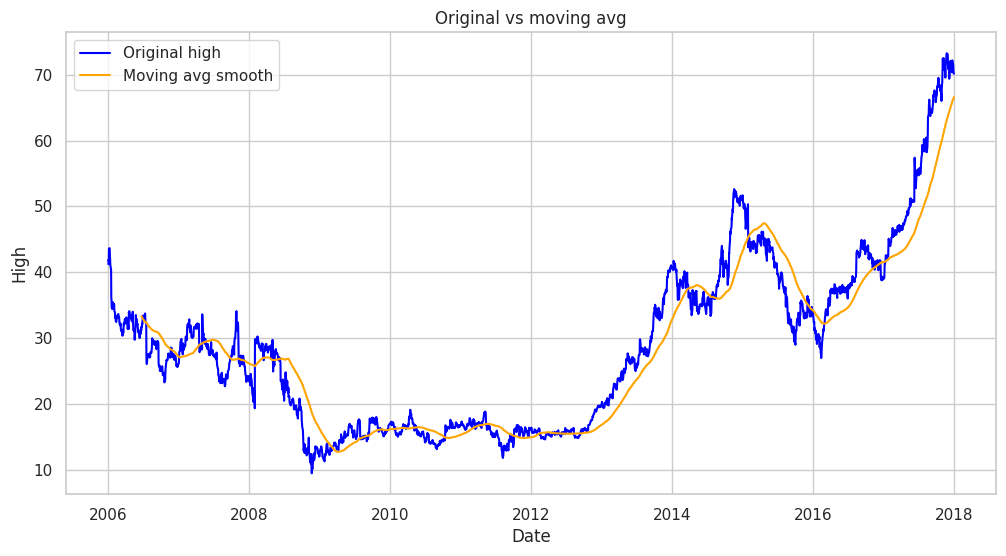

In [23]:
window_size=120
df["high_smoothed"]= df["High"].rolling(window=window_size).mean()

plt.figure(figsize=(12,6))

plt.plot(df["High"], label="Original high", color="blue")
plt.plot(df["high_smoothed"], label="Moving avg smooth", color="orange")

plt.xlabel("Date")
plt.ylabel("High")
plt.title("Original vs moving avg")
plt.legend()
plt.show()

In [24]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

df_combined.head()

,High,high_diff
Date,,
2006-01-03,41.22,NaN
2006-01-04,41.90,0.68
2006-01-05,41.73,-0.17
2006-01-06,43.57,1.84
2006-01-09,43.66,0.09


In [25]:
df.dropna(subset=['high_diff'], inplace=True)

df['high_diff'].head()

,high_diff
Date,
2006-01-04,0.68
2006-01-05,-0.17
2006-01-06,1.84
2006-01-09,0.09
2006-01-10,-0.32


In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['high_diff'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -12.14836747834324
p-value: 1.5912766134149499e-22
Critical Values: {'1%': np.float64(-3.4325316347197403), '5%': np.float64(-2.862503905260741), '10%': np.float64(-2.5672831121111113)}
